In [2]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [41]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=3, doc_content_chars_max=1000)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)

In [5]:
print(arxiv.name)

arxiv


In [13]:
arxiv.invoke("What do you know about String theory in physics")

'Published: 1996-07-17\nTitle: Relic gravitons from the pre-big bang: what we know and what we do not know\nAuthors: M. Gasperini\nSummary: I discuss the status of present knowledge about a possible background of\nrelic gravitons left by an early, pre-big bang cosmological epoch, whose\nexistence in the past of our Universe is suggested by the duality symmetries of\nstring theory.\n\nPublished: 2019-11-14\nTitle: Hadronic Strings -- A Revisit in the Shade of Moonshine\nAuthors: Lars Brink\nSummary: When asked to write a contribution to the memorial volume for Peter Freund I\nwent through my memory of the f'

In [42]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=1000)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [17]:
wiki.invoke("About India")

"Page: India\nSummary: India, officially the Republic of India, is a country in South Asia.  It is the seventh-largest country by area; the most populous country since 2023; and, since its independence in 1947, the world's most populous democracy. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan t"

Taviliy is a ai search enginr specificly fro ai

In [18]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [20]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily=TavilySearchResults()
tavily.invoke("Latest news relates to Nepla protest")

[{'title': '2025 Nepalese Gen Z protests - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/2025_Nepalese_Gen_Z_protests',
  'content': 'On 9 September 2025, former King Gyanendra Shah called for calm and resolution be found internally. On that same day, Prime Minister K. P. Sharma Oli, along with a few government ministers, resigned, and on 12 September 2025, Sushila Karki was appointed as interim Prime Minister of Nepal. By 13 September 2025 the protests had died down.\n\n## Background [...] | 2025 Nepalese Gen Z protests | |\n --- |\n| Clockwise from the top: Protesters burn down a government office • Student demonstrations • Protesters celebrating in front of a burning government office • A protestor climbing onto a gate while the Singha Durbar burns. | |\n| Date | 8 September 2025 (2025-09-08) – 13 September 2025 (2025-09-13) (5 days) |\n| Location | Nepal |\n| Caused by |  Government corruption and nepotism  Government ban on social media platforms | [...] Protestors held onli

In [22]:
## combining all the tools in a list 

tools=[arxiv,wiki,tavily]


In [23]:
## initilaizattion if llm model

from langchain_groq import ChatGroq

llm=ChatGroq(model="gemma2-9b-it")

llm_with_tools=llm.bind_tools(tools)


In [26]:
from pprint import pprint
from langchain_core.messages import AIMessage,HumanMessage

see_call=llm_with_tools.invoke([HumanMessage(content=f"What is recent Ai tend")])

In [27]:
see_call.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'recent ai trends'},
  'id': 'r1e9kdcap',
  'type': 'tool_call'}]

In [28]:
##State schema 
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

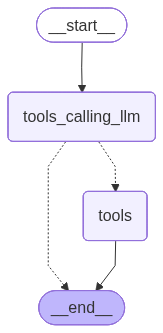

In [38]:
## entire chatboting

from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition 

## Node Definition 
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

#builder 
builder=StateGraph(State)
builder.add_node("tools_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START, "tools_calling_llm")
builder.add_conditional_edges(
    "tools_calling_llm",
    tools_condition,
)
builder.add_edge("tools",END)

graph =builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [45]:
messages=graph.invoke({"messages":HumanMessage(content="What is llm research ")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is llm research 
================================== Ai Message ==================================
Tool Calls:
  wikipedia (3hzqx2x1h)
 Call ID: 3hzqx2x1h
  Args:
    query: LLM research
================================= Tool Message =================================
Name: wikipedia

Page: Large language model
Summary: A large language model (LLM) is a language model trained with self-supervised machine learning on a vast amount of text, designed for natural language processing tasks, especially language generation.
The largest and most capable LLMs are generative pre-trained transformers (GPTs), based on a transformer architecture, which are largely used in generative chatbot
